In [14]:
from __future__ import print_function
import os,sys
import plotly.graph_objects as go
import numpy as np
import torch
import torchvision
import scipy
import torchvision.transforms as transforms
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation as R
from torch.utils.data import WeightedRandomSampler
from lartpcdataset import SparseToFull

In [15]:
def Plot3d(data_iter):
    label = data.classes[int(data_iter[1][0])]
    pos3d = data_iter[0][0]
    fig = go.Figure(data=[go.Scatter3d(
        x=pos3d[:,0],
        y=pos3d[:,1],
        z=pos3d[:,2],
        mode='markers',
        marker=dict(
            size=1,
            color=pos3d[:,3],                # set color to an array/list of desired values
            colorbar=dict(
                title="Charge"
            ),
            colorscale='Viridis',   # choose a colorscale
            opacity=0.9
        )
    )])
    fig.update_layout(
        title=label,
        scene = dict(
            xaxis = dict(nticks=6, range=[0,512]),
            yaxis = dict(nticks=6, range=[0,512]),
            zaxis = dict(nticks=6, range=[0,512]),
            aspectratio=dict(x=1, y=1, z=1)))
    fig.show()
    return 0

In [16]:
def np_loader(inp):
    with open(inp, 'rb') as f:
        npin = np.load(f)
        return npin

In [17]:
def rotated(inp,angles):
    r = R.from_euler('zyx', angles, degrees=True).as_matrix()
    #print(torch.tensor(r))
    return torch.matmul(inp,torch.tensor(r,dtype=torch.half))

In [18]:
datadirectory = "../PilarDataTrain"

In [19]:
a = np_loader(datadirectory+"/Electron/000001.npy")
full = SparseToFull()
print(full(a)[0])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [20]:
data = torchvision.datasets.DatasetFolder(root=datadirectory, loader=np_loader, extensions='.npy')

In [21]:
print(data.classes)

['Electron', 'Gamma', 'Muon', 'Pion', 'Proton']


In [22]:
idx2class = {v: k for k, v in data.class_to_idx.items()}

In [23]:
def get_class_distribution(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for element in dataset_obj:
        y_lbl = element[1]
        y_lbl = idx2class[y_lbl]
        count_dict[y_lbl] += 1
            
    return count_dict

In [24]:
def get_class_distribution1(dataset_obj):
    count_dict = {k:0 for k,v in dataset_obj.class_to_idx.items()}
    
    for i, element in enumerate(dataset_obj):
        y_lbl = element[1]
        y_lbl = idx2class[y_lbl]
        count_dict[y_lbl] += 1
        if i == 100000:
            return count_dict
            
    return count_dict

In [13]:
get_class_distribution(data)

KeyboardInterrupt: 

In [91]:
samples = {'Electron': 89714,
 'Gamma': 49801,
 'Muon': 53639,
 'Pion': 20509,
 'Proton': 71706}

sampleslist = np.array([v for k,v in samples.items()])

weights = 1/sampleslist
print(weights)

[1.11465323e-05 2.00799181e-05 1.86431514e-05 4.87590814e-05
 1.39458344e-05]


In [93]:
weighted_sampler = WeightedRandomSampler(
    weights=weights,
    num_samples=len(weights),
    replacement=True
)

In [25]:
test_loader = torch.utils.data.DataLoader(
        dataset=data,
        batch_size=1,
        shuffle=True)

In [27]:
test_loader.dataset

Dataset DatasetFolder
    Number of datapoints: 1141131
    Root location: ../PilarDataTrain

In [28]:
it = iter(test_loader)

In [29]:
print(next(it))

[tensor([[[2.0500e+02, 4.2500e+02, 4.7300e+02, 2.9739e-02],
         [1.9800e+02, 4.2100e+02, 4.8300e+02, 2.0950e-02],
         [1.9800e+02, 4.2000e+02, 4.8400e+02, 2.0950e-02],
         [1.9700e+02, 4.2100e+02, 4.8400e+02, 2.0950e-02],
         [1.9800e+02, 4.2100e+02, 4.8400e+02, 9.4055e-02],
         [1.9900e+02, 4.2100e+02, 4.8400e+02, 2.0950e-02],
         [1.9800e+02, 4.2200e+02, 4.8400e+02, 2.0950e-02],
         [2.0200e+02, 4.3000e+02, 4.8400e+02, 1.6739e-02],
         [2.0100e+02, 4.3100e+02, 4.8400e+02, 4.2297e-02],
         [2.0200e+02, 4.3100e+02, 4.8400e+02, 7.5012e-02],
         [2.0300e+02, 4.3100e+02, 4.8400e+02, 1.5404e-02],
         [2.0200e+02, 4.3200e+02, 4.8400e+02, 1.6739e-02],
         [1.9800e+02, 4.2100e+02, 4.8500e+02, 2.1774e-02],
         [2.0100e+02, 4.3000e+02, 4.8500e+02, 4.8615e-02],
         [2.0200e+02, 4.3000e+02, 4.8500e+02, 9.8511e-02],
         [2.0300e+02, 4.3000e+02, 4.8500e+02, 2.0554e-02],
         [2.0000e+02, 4.3100e+02, 4.8500e+02, 2.8290e-0

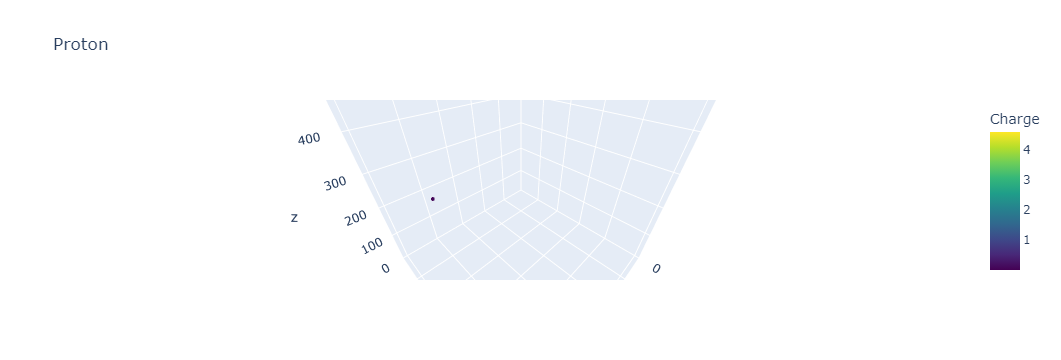

0

In [31]:
Plot3d(next(it))